# Multiclass classification with Neural Networks

In [0]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [174]:
winde = pd.read_csv("winde_data.csv")
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [175]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [176]:
wine.shape

(178, 14)

In [188]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Cultivator               178 non-null int64
 Alchol                  178 non-null float64
 Malic_Acid              178 non-null float64
 Ash                     178 non-null float64
 Alcalinity_of_Ash       178 non-null float64
 Magnesium               178 non-null int64
 Total_phenols           178 non-null float64
 Nonflavanoid_phenols    178 non-null float64
 Proanthocyanins         178 non-null float64
 Color_intensity         178 non-null float64
 Hue                     178 non-null float64
 OD280                   178 non-null float64
 Proline                 178 non-null int64
dtypes: float64(10), int64(3)
memory usage: 18.2 KB


In [177]:
wine.corr()


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


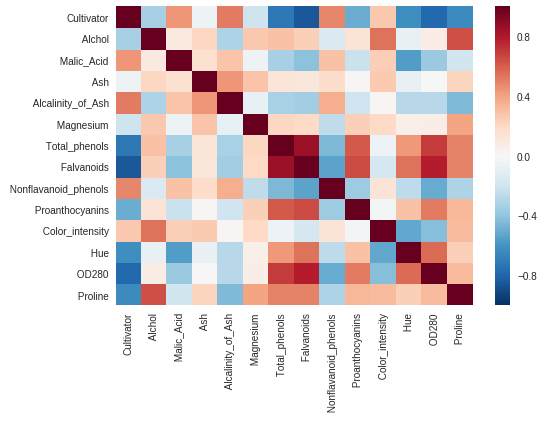

In [178]:
corr=wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [179]:
#wine=wine.drop('Falvanoids',axis=1)
wine1=wine.iloc[:,:7]
wine2=wine.iloc[:,8:]
wine=wine1.join(wine2)
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


In [180]:
wine.Cultivator.value_counts()/len(wine)*100

2    39.887640
1    33.146067
3    26.966292
Name: Cultivator, dtype: float64

In [0]:
x = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [189]:
scaler=StandardScaler()

# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [197]:
mlp = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(13,13,13),max_iter=10000, random_state=42)

mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [198]:
# NOTE
# simple recall is not available for multicall
# thus, we put "average=None" to make sure recall is calculated
# using "one class versus rest" approach
prediction = mlp.predict(x_test)
print(recall_score(y_test,prediction,average=None)*100)

[ 95. 100. 100.]


In [199]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[19  1  0]
 [ 0 13  0]
 [ 0  0 12]]


In [106]:
mlp.out_activation_

'softmax'

In [95]:
len(mlp.coefs_)

4

In [96]:
len(mlp.coefs_[0])

13

In [97]:
len(mlp.intercepts_[0])

13

In [142]:
mlp.coefs_[3]

array([[-0.47329334,  0.21013339,  0.02487175],
       [ 0.34525742,  0.03632828,  0.40796247],
       [ 0.09043608,  0.11414918,  0.39492539],
       [-0.11820886, -0.44823796, -0.57712099],
       [ 0.34235137,  0.17660703,  0.19081378],
       [-0.34017809, -0.43782227, -0.61345638],
       [-0.15026282,  0.13839198, -0.1929686 ],
       [-0.07454532,  0.49176486, -0.18465387],
       [ 0.02496964,  0.34493488, -0.13207709],
       [ 0.1548696 ,  0.45186978,  0.53713683],
       [-0.43224493,  0.52246099, -0.00965553],
       [-0.28828971, -0.04120963,  0.57127956],
       [ 0.04683395, -0.1443193 ,  0.04209082]])

### Decision Tree

In [194]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(x_train,y_train)
print(model_tree.score(x_train,y_train)*100)
print(model_tree.score(x_test,y_test)*100)
prediction = model_tree.predict(x_test)
print (recall_score(y_test,prediction,average=None)*100)

100.0
88.88888888888889
[ 80.          92.30769231 100.        ]


### Random Forest

In [201]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train,y_train)
print(model_rf.score(x_train,y_train)*100)
print(model_rf.score(x_test,y_test)*100)

# calculating recall and roc_auc scores
prediction = model_rf.predict(x_test)
print (recall_score(y_test,prediction,average=None)*100)

100.0
93.33333333333333
[100.          92.30769231  83.33333333]


### Gradient Boosting


In [202]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train,y_train)

print(model_rf.score(x_train,y_train)*100)
print(model_rf.score(x_test,y_test)*100)

prediction = model_gb.predict(x_test)
print(recall_score(y_test,prediction,average=None)*100)

100.0
93.33333333333333
[ 90.          92.30769231 100.        ]


In [203]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[18  2  0]
 [ 0 12  1]
 [ 0  0 12]]
